In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output c ols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(100, 4)

In [7]:
df.ndim

2

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt


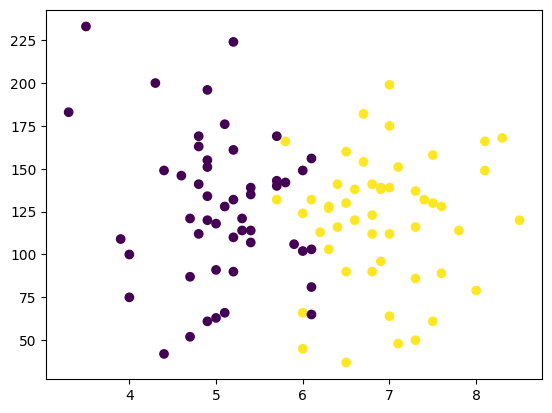

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
import seaborn as sns


<Axes: xlabel='cgpa', ylabel='iq'>

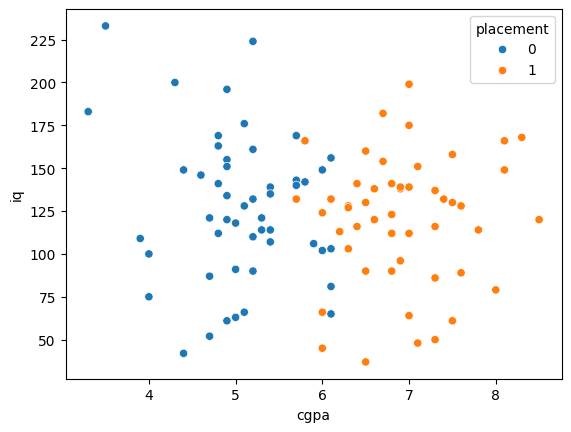

In [13]:
sns.scatterplot(data=df, x="cgpa", y="iq",hue="placement")

# Seperating Dependent and independent variables

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y.shape

(100,)

In [17]:
from sklearn.model_selection import train_test_split
# train_test_split(dependent_variables,independent_variables)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [18]:
X_train 

,cgpa,iq
3,7.4,132.0
62,6.0,102.0
25,5.0,91.0
84,5.7,169.0
81,5.4,107.0
...,...,...
91,7.5,158.0
39,4.6,146.0
18,4.0,100.0
34,4.8,163.0


In [19]:
y_train

3     1
62    0
25    0
84    0
81    0
     ..
91    1
39    0
18    0
34    0
50    0
Name: placement, Length: 90, dtype: int64

In [20]:
X_test

,cgpa,iq
80,4.9,196.0
86,5.1,128.0
64,7.0,64.0
5,7.1,48.0
92,5.2,110.0
24,4.7,121.0
55,7.8,114.0
73,4.9,61.0
56,6.1,65.0
43,6.8,141.0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [24]:
X_train

array([[ 1.22841879,  0.1634618 ],
       [ 0.00485541, -0.61083095],
       [-0.86911843, -0.89473829],
       [-0.25733674,  1.11842286],
       [-0.5195289 , -0.48178215],
       [-0.69432366,  0.91194479],
       [-1.0439132 , -0.35273336],
       [-1.13131059, -1.90131886],
       [ 1.14102141, -1.95293837],
       [ 0.79143187, -0.76568949],
       [ 0.87882925,  1.27328141],
       [ 0.87882925, -0.35273336],
       [ 0.44184233, -2.28846523],
       [-2.35487397,  1.47975947],
       [ 0.09225279,  0.1634618 ],
       [-0.5195289 ,  0.24089108],
       [-0.25733674,  0.1634618 ],
       [ 0.44184233,  0.11184229],
       [ 0.26704756, -0.58502119],
       [ 1.31581618, -1.66903103],
       [-1.48090012,  1.91852536],
       [-0.69432366,  0.1634618 ],
       [ 0.00485541, -2.08198716],
       [-1.13131059, -0.99797732],
       [ 0.44184233,  0.88613503],
       [ 0.00485541, -1.53998224],
       [ 0.87882925,  0.34413011],
       [-0.69432366,  2.53795956],
       [ 1.31581618,

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[-0.95651582,  1.81528633],
       [-0.78172105,  0.06022277],
       [ 0.87882925, -1.59160176],
       [ 0.96622664, -2.00455789],
       [-0.69432366, -0.40435288],
       [-1.13131059, -0.12044554],
       [ 1.57800833, -0.30111385],
       [-0.95651582, -1.66903103],
       [ 0.09225279, -1.565792  ],
       [ 0.70403448,  0.39574963]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [29]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred = clf.predict(X_test)

In [47]:
X_test

array([[-0.95651582,  1.81528633],
       [-0.78172105,  0.06022277],
       [ 0.87882925, -1.59160176],
       [ 0.96622664, -2.00455789],
       [-0.69432366, -0.40435288],
       [-1.13131059, -0.12044554],
       [ 1.57800833, -0.30111385],
       [-0.95651582, -1.66903103],
       [ 0.09225279, -1.565792  ],
       [ 0.70403448,  0.39574963]])

In [38]:
y_test

80    0
86    0
64    1
5     1
92    0
24    0
55    1
73    0
56    0
43    1
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.9

In [43]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

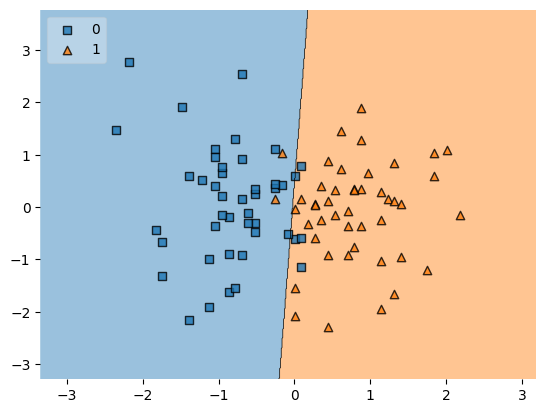

In [44]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [45]:
import pickle

In [49]:
pickle.dump(clf,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
